<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter9/Python_Codes_Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 9.1

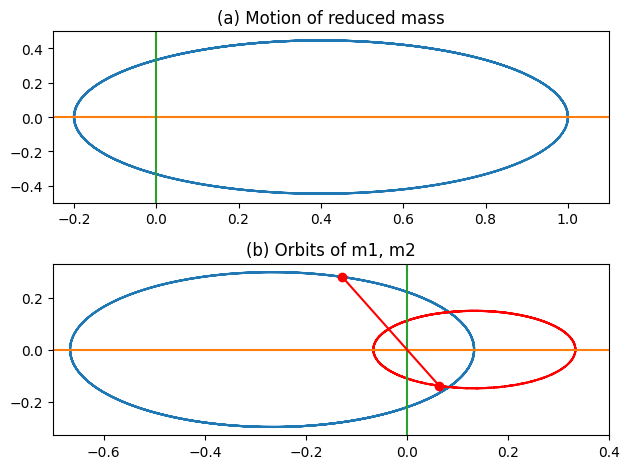

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# function defines the differential equations
# Y[0]=x, Y[1]=x', Y[2]=y, Y[3]=y'
def deriv(Y,t):
    return np.array([ Y[1], -(m1+m2)*\
    Y[0]/((Y[0]**2+Y[2]**2)**(3/2)),
                      Y[3], -(m1+m2)*\
    Y[2]/((Y[0]**2+Y[2]**2)**(3/2))])

t = np.linspace(0,6,600)  # t= array of times to be evaluated
m1, m2 = 1, 2             # masses

# yinit = initial conditions [x(0), x'(0), y(0), y'(0)
yinit = np.array([1, 0, 0, 1])

Y = odeint(deriv, yinit, t) # solve the odes using odeint

# plot motion of reduced mass
plt.subplot(2,1,1)
plt.plot(Y[:,0],Y[:,2],label="Motion of reduced mass")
plt.xlim(-.25,1.1);
plt.ylim(-.5,.5);
plt.plot(np.linspace(-.25,1.1,100),[0]*100)  # draw x-axis
plt.plot([0]*100,np.linspace(-.5,.5,100))  # draw y-axis
plt.title("(a) Motion of reduced mass")

# plot orbits of m1, m2
plt.subplot(2,1,2)
plt.plot(-(m2/(m1+m2))*Y[:,0],-(m2/(m1+m2))*Y[:,2])
plt.plot((m1/(m1+m2))*Y[:,0],(m1/(m1+m2))*Y[:,2],'r--')
plt.title("(b) Orbits of m1, m2")
plt.xlim(-.7,.4);
plt.ylim(-.33,.33);
plt.plot(np.linspace(-.7,.4,100),[0]*100)  # draw x-axis
plt.plot([0]*100,np.linspace(-.33,.33,100))  # draw y-axis

# draw line connecting m1 and m2 at time t=1 s
x1, y1 = np.array([[-(m2/(m1+m2))*Y[:,0][100],\
(m1/(m1+m2))*Y[:,0][100]],\
[-(m2/(m1+m2))*Y[:,2][100],(m1/(m1+m2))*Y[:,2][100]]])
for i in range(0, len(x1), 2):
    plt.plot(x1[i:i+2], y1[i:i+2], 'ro-')
plt.tight_layout()
plt.show()


# Example 9.2

In [ ]:
%reset -f

from sympy import  symbols,dsolve, Function, diff

print('-'*28,'CODE OUTPUT','-'*29,'\n')
r, k, theta, L, mu, t =symbols('r,k,theta,L,mu,t',real=True)

# Part (a) : find force F(r)
rr = k*theta

force = -L**2/(mu*rr**2)*(diff(1/rr,theta,theta)+1/rr)

print('The force F(r) = ',force.expand().subs({theta:r/k}))

# Part (b) : we use symbol theta2 intead of theta
# in the ODE, since theta defined as a symbol in part (a)

theta2 = Function('theta2')

ic = {theta2(0):0}

soln = dsolve(mu*k**2*theta2(t)**2*diff(theta2(t),t)-L,\
              theta2(t),ics=ic)[0]

print('\nThe solution theta(t) = ',soln.rhs)


---------------------------- CODE OUTPUT ----------------------------- 

The force F(r) =  -2*L**2*k**2/(mu*r**5) - L**2/(mu*r**3)

The solution theta(t) =  3**(1/3)*(L*t/(k**2*mu))**(1/3)


# Example 9.4

The eccentricity of Earth is  e =  0.017
The eccentricity of Mercury is  e =  0.2069


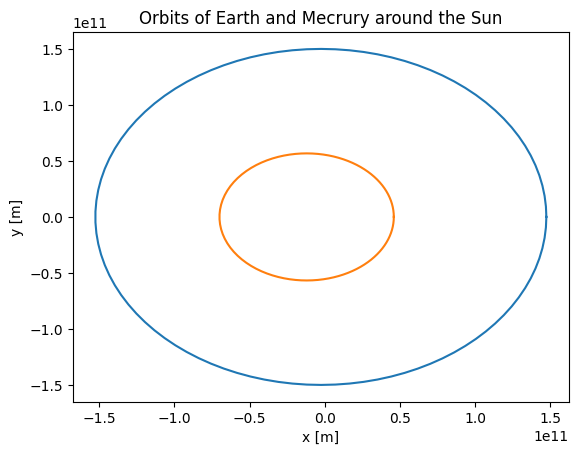

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

rminE = 147.5*10**9
rmaxE = 152.6*10**9

a = (rminE + rmaxE)/2
eEarth = (rmaxE - rminE)/(rminE + rmaxE)
print('The eccentricity of Earth is  e = ', round(eEarth,4))

alpha = a*(1 - eEarth**2)

theta = np.linspace(0,2*np.pi,100)
rE = alpha/(1 + eEarth*np.cos(theta))

plt.plot(rE*np.cos(theta),rE*np.sin(theta))

rminM = 46*10**9
rmaxM = 70*10**9

aM = (rminM + rmaxM)/2
eMercury = (rmaxM - rminM)/(rminM + rmaxM)
print('The eccentricity of Mercury is  e = ', round(eMercury,4))

alphaM = aM*(1 - eMercury**2)
rM = alphaM/(1 + eMercury*np.cos(theta))

plt.plot(rM*np.cos(theta),rM*np.sin(theta))
plt.title('Orbits of Earth and Mecrury around the Sun')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()


# Example 9.5

---------------------------- CODE OUTPUT ----------------------------- 


The semimajor axis a =  384400000.0 m
\The eccentricity of moon's orbit =  0.0549
\The Revolution period T of moon =  27.29  days


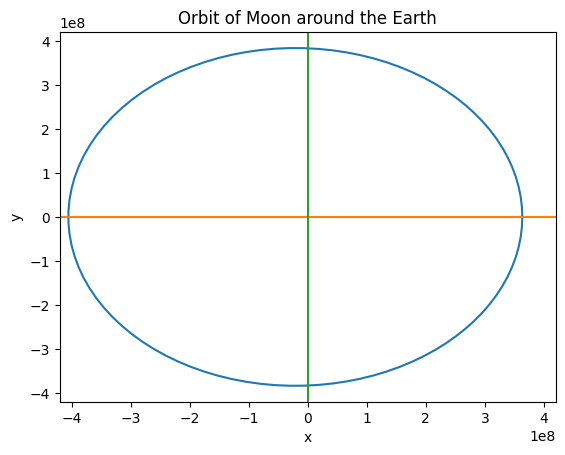

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# All quantities are in SI units
perigee = 0.3633*10**9;
apogee = 0.4055*10**9;
Mmoon = 0.07346*10**24;
Mearth = 5.9724*10**24;
G = 6.673*10**-11;

e = (apogee - perigee)/(apogee + perigee)
a = (perigee + apogee)/2;
Period = np.sqrt(4*np.pi**2*a**3/(G*(Mmoon + Mearth)));

print('\nThe semimajor axis a = ', a, 'm');
print("\nThe eccentricity of moon's orbit = ", round(e,4))
print('\nThe Revolution period T of moon = ', \
      round(Period/(3600*24),2), ' days')

theta = np.linspace(0,2*np.pi,100)
alpha = a*(1 - e**2)
r = alpha/(1 + e*np.cos(theta))

plt.plot(r*np.cos(theta),r*np.sin(theta))
plt.title("Orbit of Moon around the Earth")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4.2*10**8, 4.2*10**8);
plt.ylim(-4.2*10**8, 4.2*10**8);

# draw x-y-axes
plt.plot(np.linspace(-4.2*10**8,4.2*10**8,100),[0]*100)
plt.plot([0]*100,np.linspace(-4.2*10**8,4.2*10**8,100))
plt.show()


# Example 9.7

---------------------------- CODE OUTPUT ----------------------------- 

Best slope = 3.115575361541545e-16
Mass of Jupiter =  1.89858509859859e+27  kg


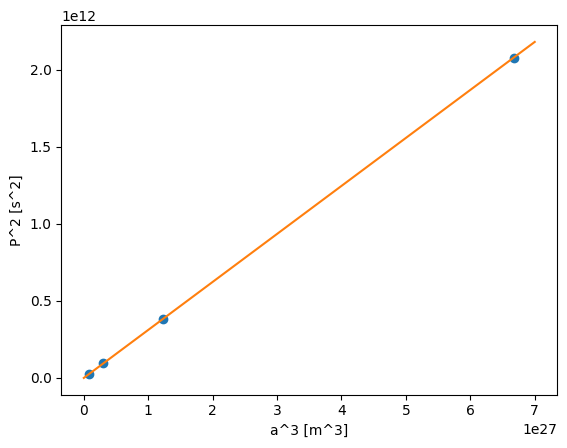

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sympy import solve, symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

M = symbols('M')
G = 6.67408*10**-11

aValues = np.array([4.21700*10**8, 6.71034*10**8, 10.70412*10**8,\
                    18.82709*10**8])
acube = [aValues[i]**3 for i in range(4)]

periods = np.array([1.7691*3600*24, 3.5512*3600*24, 7.1546*3600*24,\
                    16.689*3600*24])
psquare = [periods[i]**2 for i in range(4)]

plt.plot(acube,psquare,'o')    # plot period^2 vs a^3

plt.xlabel('a^3 [m^3]')
plt.ylabel('P^2 [s^2]')

m,b = np.polyfit(acube, psquare, 1)

print('Best slope =', m)

mJupiter = solve(m - 4*np.pi**2/(G*M), M)
print('Mass of Jupiter = ', mJupiter[0], " kg");

x = np.linspace(0,7*10**27,100)
plt.plot(x,b + m*x)             # plot best fit line
plt.show()


# The restricted three-body problem

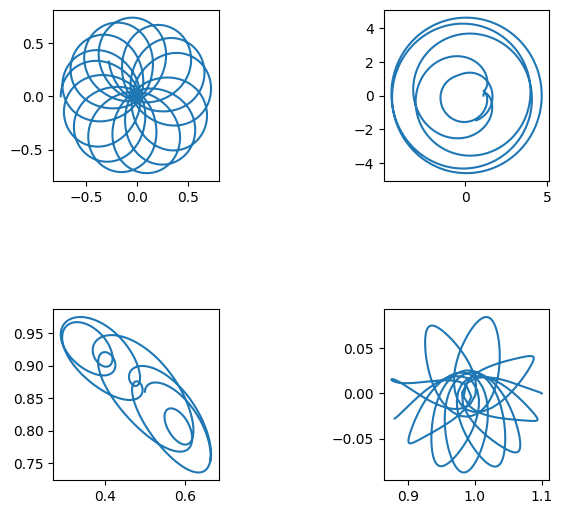

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

mu = 0.01

def threeBody(vec,t):
    x, y, u, v = vec

    peXterm = -(1.0-mu)*(x+mu)/((x+mu)**2+y**2)**(1.5)-mu*\
        (x-1.0+mu)/((x-1.0+mu)**2+y**2)**(1.5)
    peYterm = -y*(1.0-mu)/((x+mu)**2+y**2)**(1.5)-mu*y/((x-1.0+\
        mu)**2+y**2)**(1.5)
    derivative = [u, v, 2*v + x + peXterm, -2*u + y + peYterm ]
    return derivative

initialCondition1 = [-0.75, 0, 0, 1]
t=np.linspace(0,20,2001)
sol1 = odeint(threeBody, initialCondition1, t)

initialCondition2 = [1.1, 0, 0, 0.3]
t=np.linspace(0,50,5001)
sol2 = odeint(threeBody, initialCondition2, t)


initialCondition3 = [0.5, 0.86, 0, 0.02]
t=np.linspace(0,50,5001)
sol3 = odeint(threeBody, initialCondition3, t)

initialCondition4 = [1.1, 0.0, 0, 0.01]
t=np.linspace(0,10,1001)
sol4 = odeint(threeBody, initialCondition4, t)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=1.0)

ax1.plot(sol1[:,0],sol1[:,1])
ax2.plot(sol2[:,0],sol2[:,1])
ax3.plot(sol3[:,0],sol3[:,1])
ax4.plot(sol4[:,0],sol4[:,1])

plt.show()